In [7]:
# Standard imports
import os
#from importlib import reload

# Third-party imports
import pandas as pd
import matplotlib.pyplot as plt

# Project imports
import twinlab_client as tl
#reload(tl)

In [8]:
# File paths
campaign_dir = "./../campaigns/basic/"
file_train = campaign_dir + "train.csv"
file_eval = campaign_dir + "eval.csv"
file_params = campaign_dir + "params.json"

# User information
user_info = {
    "campaign": "basic"
}

In [9]:
# Load training and evaluation data
df_train = pd.read_csv(file_train)
df_eval = pd.read_csv(file_eval)

In [10]:
# Run TwinLab
tl.upload_data(file_train, user_info)
tl.new_campaign(file_params, user_info)
df_mean, df_std = tl.sample_emulator(file_eval, user_info)

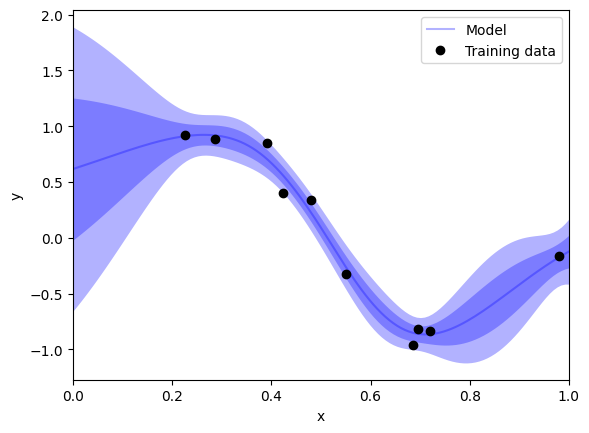

In [11]:
# Plot results
color = "blue"
alpha = 0.3
plt.fill_between(df_eval["x"], df_mean["y0"]-2.0*df_std["y0"], df_mean["y0"]+2.0*df_std["y0"], lw=0, color=color, alpha=alpha)
plt.fill_between(df_eval["x"], df_mean["y0"]-df_std["y0"], df_mean["y0"]+df_std["y0"], lw=0, color=color, alpha=alpha)
plt.plot(df_eval["x"], df_mean["y0"], color=color, alpha=alpha, label="Model")
plt.plot(df_train["x"], df_train["y"], "o", color="black", label="Training data")
plt.xlim((0.0, 1.0))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [12]:
# Delete campaign
tl.delete_campaign(user_info)